In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TF_raw_data = 'Raw_data.csv'
'Load the CSV file into a DataFrame'
df_raw_data = pd.read_csv(TF_raw_data)
'check how the raw data looks'


'check how the raw data looks'

In [2]:
#check how the raw data look like.
print(df_raw_data.head(5))

         sequence         label
0  ATCCGTTTCCGGGT  binding site
1  GGCTTTTCGGGCTA  binding site
2  CCCTGCTCTGCCTG  binding site
3  CGCTCCCCGGCGGC  binding site
4  GGGCGGGGCCTGGG  binding site


In [3]:
'check how big is the data set by shape attribute'
'Get the shape of the DataFrame'
shape = df_raw_data.shape
print(shape)

(2400, 2)


In [4]:
'checking if there is any missing value in my raw data'
missing_values = df_raw_data.isnull()
missing_value_counts = missing_values.sum()
print(missing_value_counts)



sequence    0
label       0
dtype: int64


In [5]:
#now it is needed to find the features in my sequence.
#first we have to turn our sequences into the k-mers.
#K-mers are contiguous subsequences of length k (k consecutive nucleotides) that are extracted from DNA sequences, which are commonly used as features to represent and analyze genetic information.
#I use countervectrizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer
seq_text = df_raw_data['sequence']
#print(seq_text)

In [6]:
#print(seq_text)

In [7]:
# Set the value of k
k = 3  
vectorizer = CountVectorizer(analyzer='char', ngram_range=(k, k))
X_variable = vectorizer.fit_transform(seq_text)
print(X_variable.shape)
#print(X_variabl)



(2400, 64)


In [ ]:
feature_names = vectorizer.get_feature_names()
#print(feature_names)

for i, sequence in enumerate(seq_text):
    print("Sequence:", sequence)
    for j, feature in enumerate(feature_names):
        count = X_variable[i, j]
        print("Feature:", feature, "Count:", count)
    print()


In [9]:
#visualizing the x vector to see the frequencies.
#sequences are converted to vectores.vectors contains occurance of each kmer.
X_array = X_variable.toarray()
X_array

array([[0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 2],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
#converting binding and non-binding vallues in the data frame into binary 
import pandas as pd
df_raw_data['binary_label'] = df_raw_data['label'].map({'binding site': 1, 'non-binding site': 0})
#print(df_raw_data.head(2000))
Y_variable = df_raw_data[ 'binary_label']#Checking the label type after converting to binary value

In [20]:
#now we devide the data sets into three parts: training(50%), evaluation(30%), test(20%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_variable, Y_variable, test_size=0.20, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.37, random_state=1)

In [21]:
#checking if spliting is okay. 
print("Training set shapes:")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print()

print("Validation set shapes:")
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print()

print("Test set shapes:")
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

Training set shapes:
x_train shape: (1209, 64)
y_train shape: (1209,)

Validation set shapes:
x_val shape: (711, 64)
y_val shape: (711,)

Test set shapes:
x_test shape: (480, 64)
y_test shape: (480,)


In [22]:
#ratio check: The ratio of each group to the total
print('Train:',x_train.shape[0]/df_raw_data.shape[0])
print('Validation:',x_val.shape[0]/df_raw_data.shape[0])
print('Validation:',x_test.shape[0]/df_raw_data.shape[0])

Train: 0.50375
Validation: 0.29625
Validation: 0.2


In [23]:
#creating the model of random forest.
#to increase the efficiency of randome forest.
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100 , random_state=43)
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=43)

In [25]:
#training the model with validatin data set. 
y_prediction = clf.predict(x_val)


Accuracy: 0.869198312236287


In [45]:
#checking the accuracy of the model
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_val, y_prediction))

Accuracy: 0.869198312236287


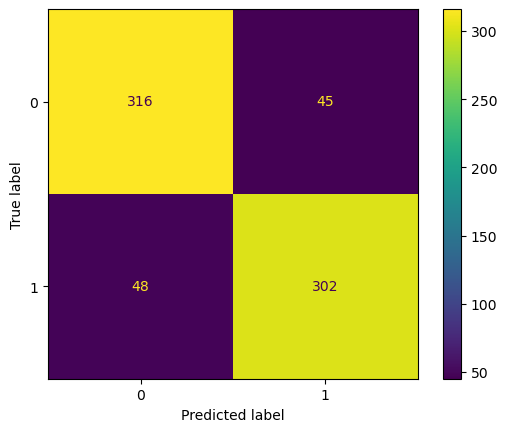

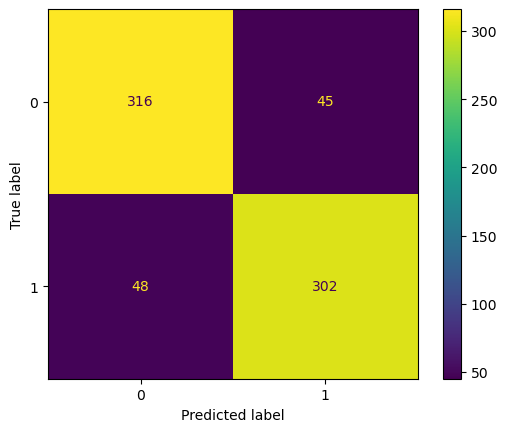

In [31]:
#testing the performance of our model by condusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_prediction)
disp = ConfusionMatrixDisplay.from_predictions(y_val, y_prediction)
disp.plot()


In [37]:
#3) Classification Report:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_prediction))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       361
           1       0.87      0.86      0.87       350

    accuracy                           0.87       711
   macro avg       0.87      0.87      0.87       711
weighted avg       0.87      0.87      0.87       711



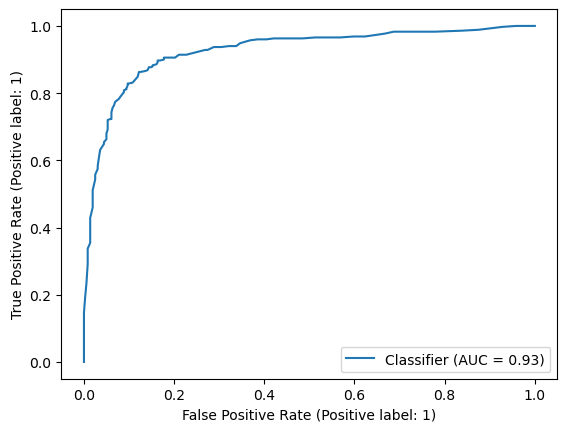

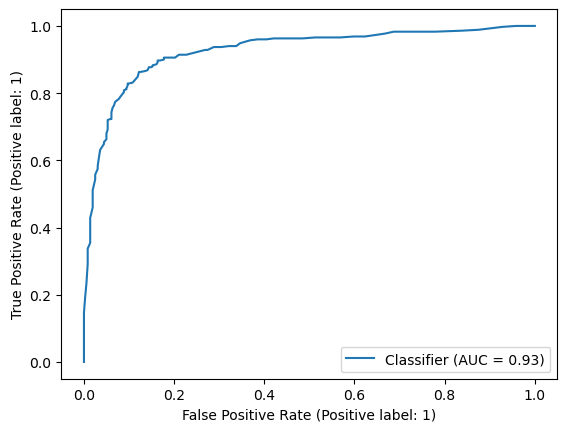

In [35]:
#2) ROC Curve (receiver operating characteristic):
#ROC curve summarizes all of the confusion matrices that each threshold produced
from sklearn.metrics import RocCurveDisplay

# Calculate the predicted probabilities for the positive class
y_pred_prob = clf.predict_proba(x_val)[:, 1]

# Create the RocCurveDisplay object from the predicted probabilities and true labels
roc_display = RocCurveDisplay.from_predictions(y_val, y_pred_prob)

# Plot the ROC curve
roc_display.plot()


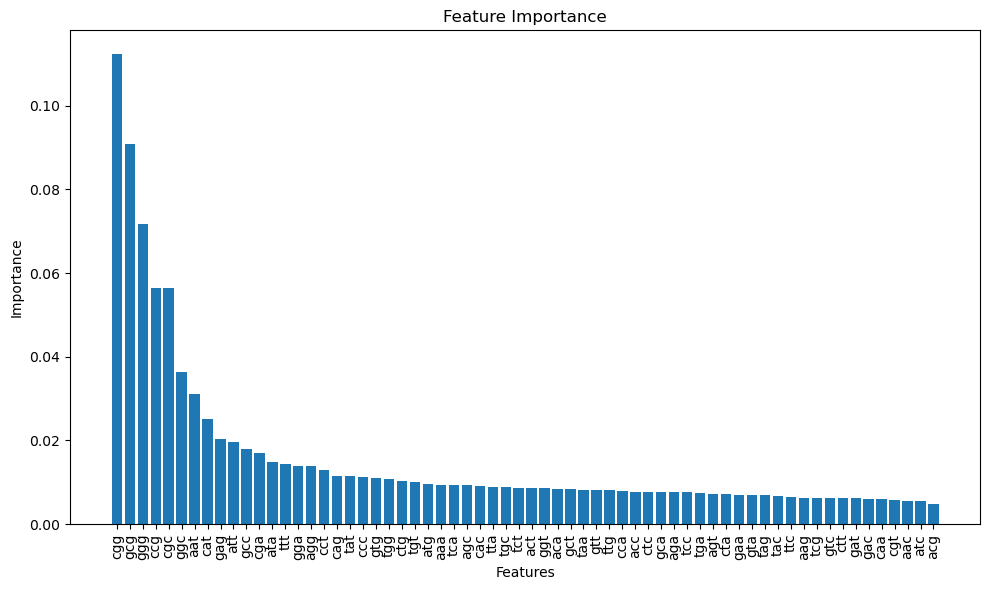

In [39]:
import matplotlib.pyplot as plt

# Train your random forest model (assuming clf is your trained model)

# Get feature importances
importances = clf.feature_importances_

# Get the names of the features (assuming you have stored them in a list called feature_names)
feature_names = vectorizer.get_feature_names()

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()



In [52]:
#making a table containing important k-mers in our model
import pandas as pd

# Create a dataframe of feature names and importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance in descending order
sorted_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the sorted table
print(sorted_importances)


   Feature  Importance
26     cgg    0.112428
38     gcg    0.090805
42     ggg    0.071716
22     ccg    0.056503
25     cgc    0.056414
..     ...         ...
16     caa    0.006004
27     cgt    0.005818
1      aac    0.005530
13     atc    0.005447
6      acg    0.004909

[64 rows x 2 columns]


In [44]:
#at the end for reprentaion of data we feed the test dataset to the model
y_pred_test = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

Accuracy: 0.8520833333333333


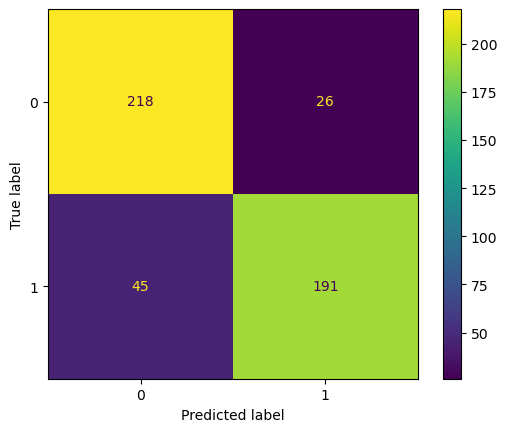

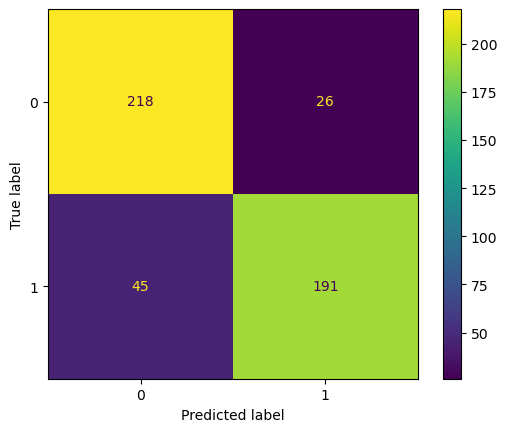

In [53]:
#chekcing the confusion plot of the test result
y_pred_test = clf.predict(x_test)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
cm_display.plot(values_format='')


In [54]:
#checking classification of test result
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       244
           1       0.88      0.81      0.84       236

    accuracy                           0.85       480
   macro avg       0.85      0.85      0.85       480
weighted avg       0.85      0.85      0.85       480

